In [1]:
import numpy as np
import tensorflow as tf
import tensorview as tv

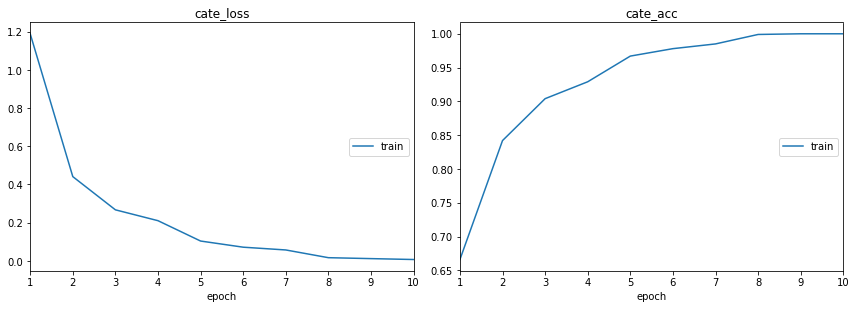

In [2]:
def simple_mnist(batch_num=1000, batch_size=32, image_shape=(28,28,1)):
    image = tf.keras.Input(shape=image_shape)
    x = tf.keras.layers.Conv2D(64, 3)(image)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.MaxPool2D(2)(x)
    x = tf.keras.layers.Conv2D(64, 3)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Flatten()(x)
    logit = tf.keras.layers.Dense(10, activation='softmax')(x)
    model = tf.keras.Model(image, logit)
    model.compile(loss=['sparse_categorical_crossentropy'],
                  optimizer=tf.keras.optimizers.Adam(0.001),
                  metrics=['accuracy'])
    
    (X_train, y_train), (_, _) = tf.keras.datasets.fashion_mnist.load_data()
    X_train = np.expand_dims(X_train/127.5-1., axis=3)[:1000, :,:,:]
    y_train = y_train.reshape(-1, 1)[:1000, :]
    
    tv_plot = tv.train.PlotMetricsOnEpoch(metrics_name=['cate_loss', 'cate_acc'], columns=2, iter_num=10)
    model.fit(X_train, y_train, batch_size=16, epochs=10, verbose=0, callbacks=[tv_plot])
    return model


if __name__ == '__main__':
    model = simple_mnist()

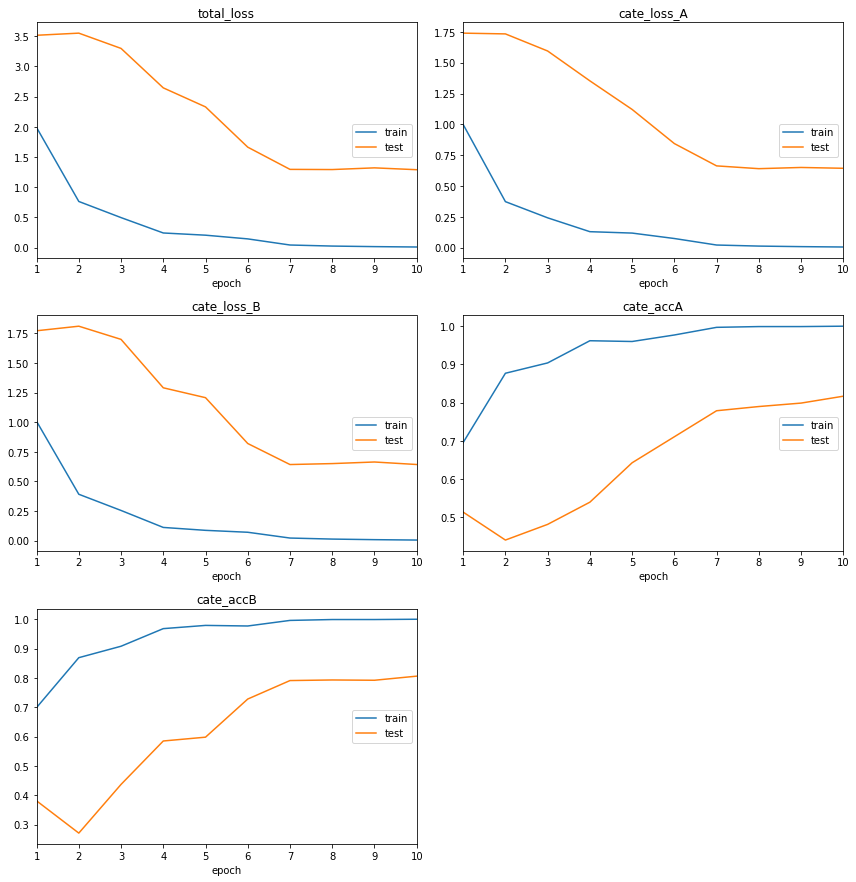

In [4]:
def simple_mnist(batch_num=1000, batch_size=32, image_shape=(28,28,1)):
    image = tf.keras.Input(shape=image_shape)
    x = tf.keras.layers.Conv2D(64, 3)(image)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.MaxPool2D(2)(x)
    x = tf.keras.layers.Conv2D(64, 3)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Flatten()(x)
    logit = tf.keras.layers.Dense(10, activation='softmax')(x)
    logit1 = tf.keras.layers.Dense(10, activation='softmax')(x)
    model = tf.keras.Model(image, [logit, logit1])
    model.compile(loss=['sparse_categorical_crossentropy', 'sparse_categorical_crossentropy'], 
                  optimizer=tf.keras.optimizers.Adam(0.001),
                  metrics=['accuracy', 'accuracy'])
    
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
    X_train = np.expand_dims(X_train/127.5-1., axis=3)[:1000, :,:,:]
    X_test = np.expand_dims(X_test/127.5-1., axis=3)[:1000,:,:,:]
    y_train = y_train.reshape(-1, 1)[:1000, :]
    y_test = y_test.reshape(-1, 1)[:1000,:]
    
    tv_plot = tv.train.PlotMetricsOnEpoch(metrics_name=['total_loss', 'cate_loss_A', 'cate_loss_B', 'cate_accA', 'cate_accB'],
                                        columns=2, iter_num=10, valid_fmt="test_{}")
    model.fit(X_train, [y_train,y_train], batch_size=16, epochs=10, verbose=0,
              callbacks=[tv_plot], validation_data=(X_test,[y_test,y_test]))
    return model


if __name__ == '__main__':
    model = simple_mnist()